# Prediction Of Car Price


## Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

1. Which variables are significant in predicting the price of a car
2. How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Buisness Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 


In [114]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# setting the dispaly
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


# Data Inspection

In [116]:
# Reading The dataset 
car_df = pd.read_csv('CarPrice_Assignment.csv')
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [117]:
car_df.shape

(205, 26)

In [118]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [119]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [120]:
car_df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [121]:
# Checking Null values
round(car_df.isnull().mean()*100,4)
# There are no NULL values in the dataset, hence it is clean.

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [122]:
#checking duplicates
sum(car_df.duplicated(subset = 'car_ID')) == 0
# No duplicate values

True

## Data Preparation
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [123]:
#Spliting the CarName for getting the Car company name
car_df['Company_Name'] = car_df.CarName.str.split(' ').str.get(0).str.lower()

In [124]:
# dropping the carname variable
car_df.drop(['CarName'],axis=1,inplace=True)
car_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [125]:
len(set(car_df.Company_Name.values))

27

In [126]:
car_df.Company_Name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [127]:
len(car_df.Company_Name.unique())

27

### From the above result it can be found that few of the car company name is repeated with spelling mistake so it needs cleaning
1. maxda = mazda
2. Nissan = nissan
3. porsche = porcshce
4. toyota = toyouta
5. vokswagen = volkswagen = vw

In [128]:
def replace_company_name(a,b):
    car_df.Company_Name.replace(a,b,inplace=True)

replace_company_name('maxda','mazda')
replace_company_name('porcshce','porsche')
replace_company_name('toyouta','toyota')
replace_company_name('vokswagen','volkswagen')
replace_company_name('vw','volkswagen')

car_df['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [129]:
len(car_df['Company_Name'].unique())

22

In [130]:
#Checking for duplicates
car_df.loc[car_df.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name


## Univariate Analysis

### Analysis of Target variable :price

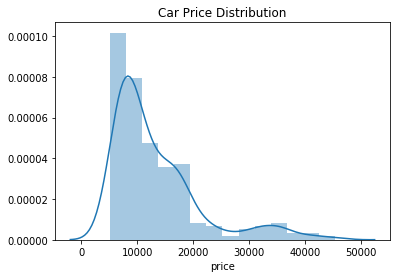

In [131]:
plt.title('Car Price Distribution')
sns.distplot(car_df.price)

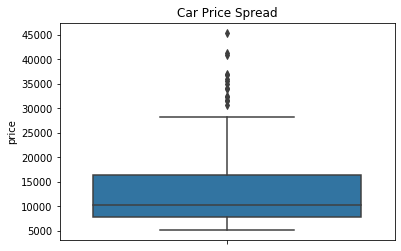

In [132]:
plt.title('Car Price Spread')
sns.boxplot(y=car_df.price)

In [133]:
car_df.price.describe()

count    205.000000  
mean     13276.710571
std      7988.852332 
min      5118.000000 
25%      7788.000000 
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Inference:
1. Price is right skewed. It can be seen from the price distribution graph most of the car price comes under 18000
2. large standard deviation means considerable variances in the prices of the automobiles.

## User Defined function for designing the different types of plot

In [134]:
# Categorical plotting of data

In [135]:
def categorical_plot(feature):
    # Finding the count
    plt.title(feature+' Histogram')
    g=sns.countplot(x=feature, data=car_df,order = car_df[feature].value_counts().index)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.gcf().set_size_inches(11.7, 8.27)
    plt.show()
    # Finding the average price
    df = pd.DataFrame(car_df.groupby([feature])['price'].mean().sort_values(ascending = False)).plot.bar()
    plt.title(feature+" "+ "vs Average Price")
    plt.ylabel('Average Price')
    plt.gcf().set_size_inches(11.7, 8.27)
    plt.show()
    # FInding the countplot
    plt.title(feature+" "+'vs Price')
    g=sns.boxplot(x=feature, y='price', data=car_df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.gcf().set_size_inches(11.7, 8.27)
    plt.show()

    
    
    

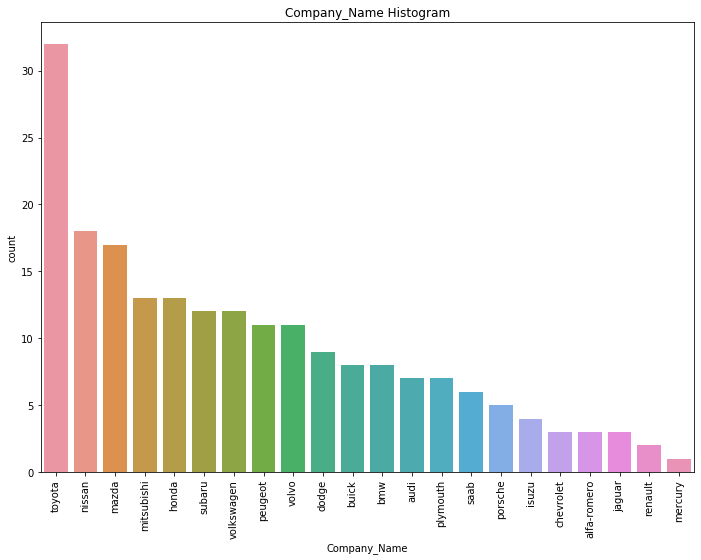

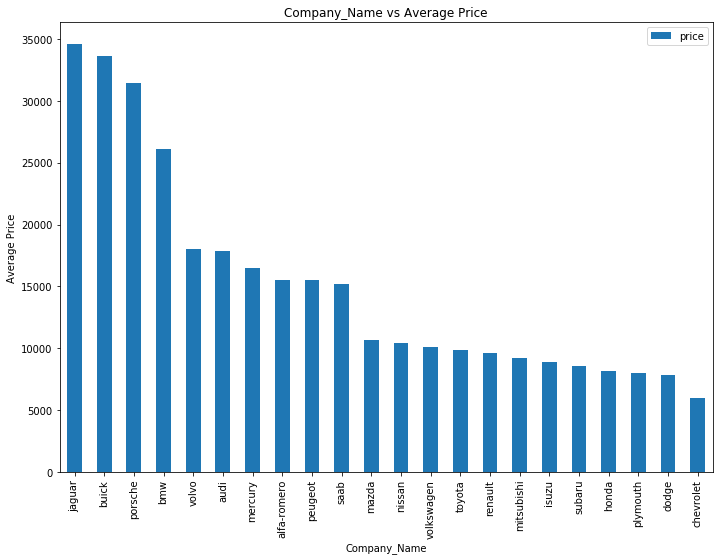

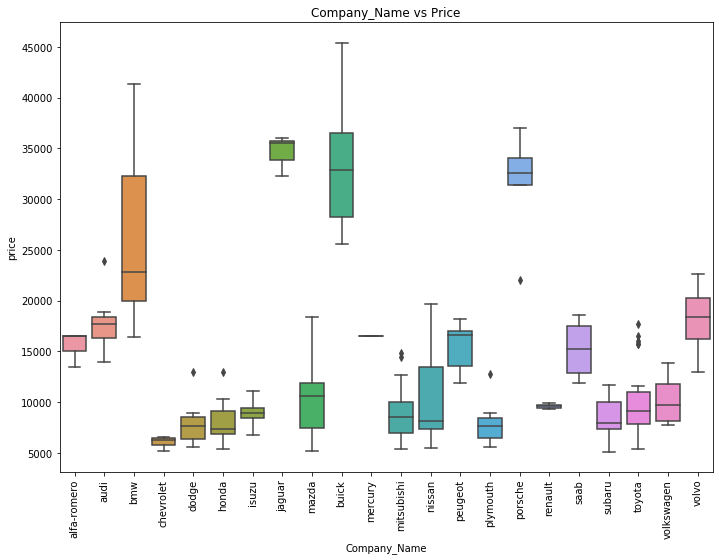

In [136]:
categorical_plot('Company_Name')

## Inferences: 

1.Toyata has maximum sale in the market.

2.Jaguar has maximum average price

In [137]:
car_df.dtypes

car_ID              int64  
symboling           int64  
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
Company_Name        object 
dtype: object

In [138]:
# for selecting all categorical variable
car_df.select_dtypes(include=["bool_","object_"]).columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Company_Name'],
      dtype='object')

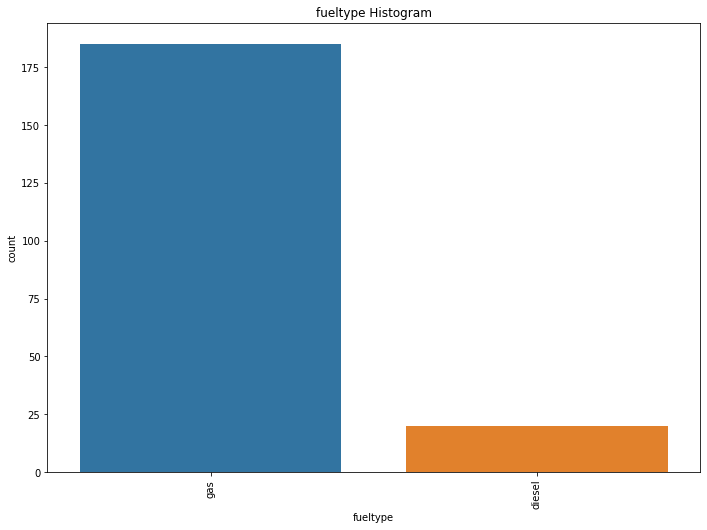

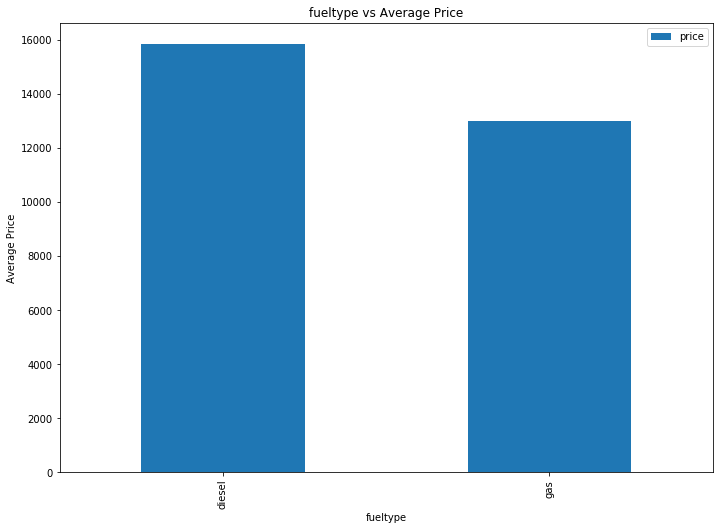

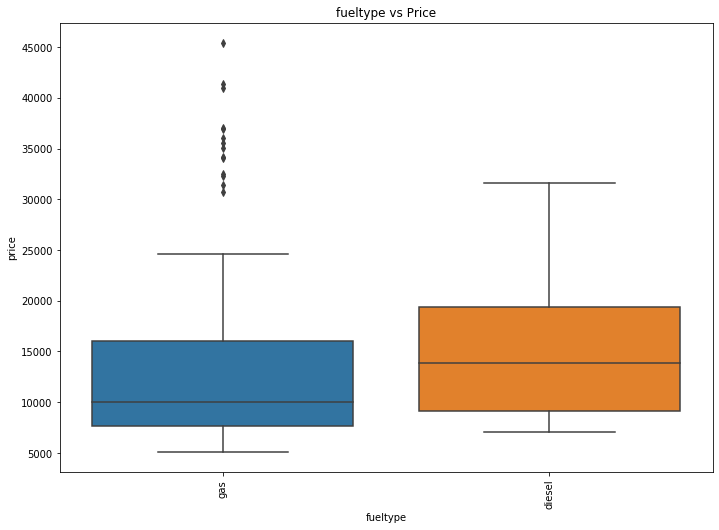

In [139]:
categorical_plot('fueltype')

## Inferences:

1. Disel car has maximum sale in the market

2. DIsel car average price is more as compare to gas car in the market.

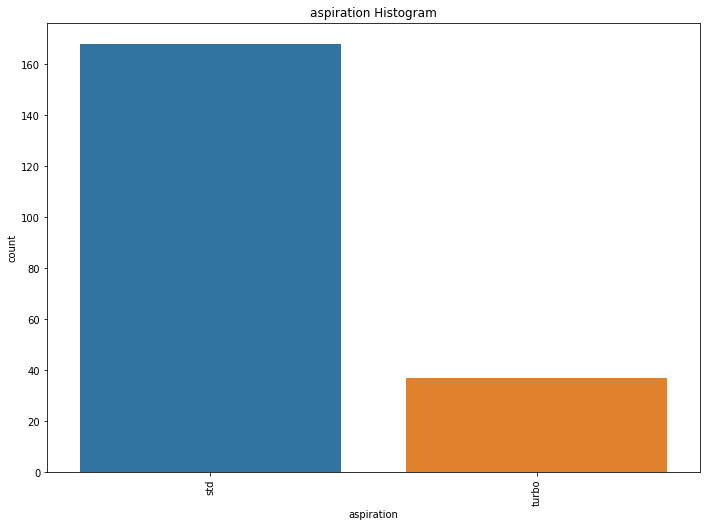

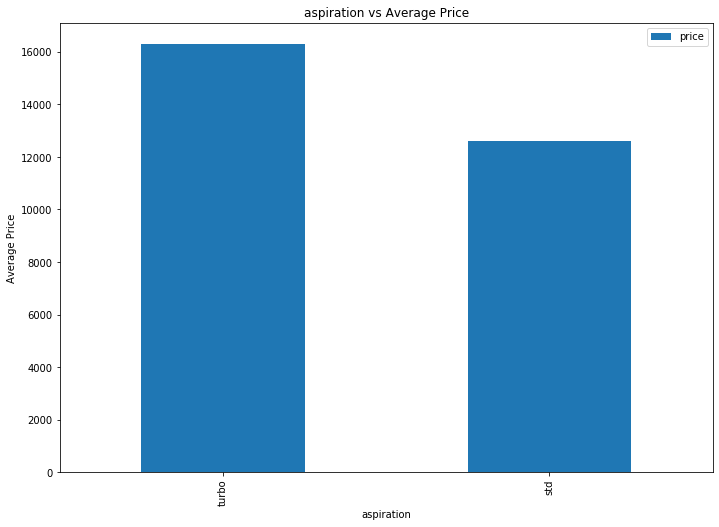

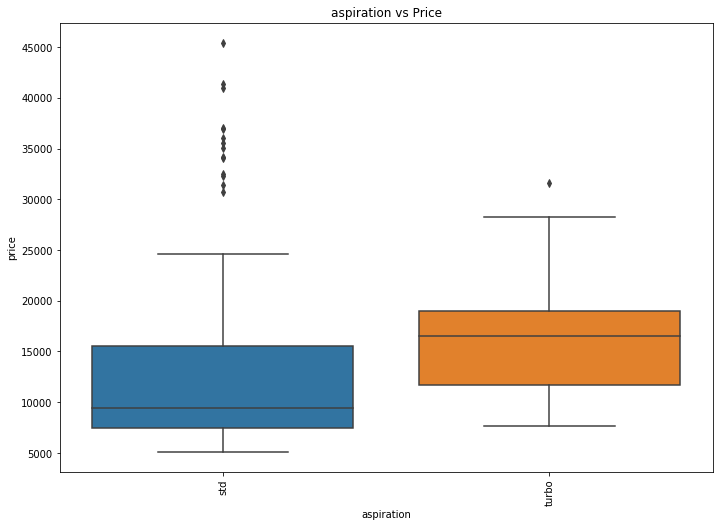

In [140]:
categorical_plot('aspiration')

## Inferences:

1.Cars with turbo aspiration engine are priced more than standard ones.

2.Cars with standard aspiration engine having more sale than turbo.

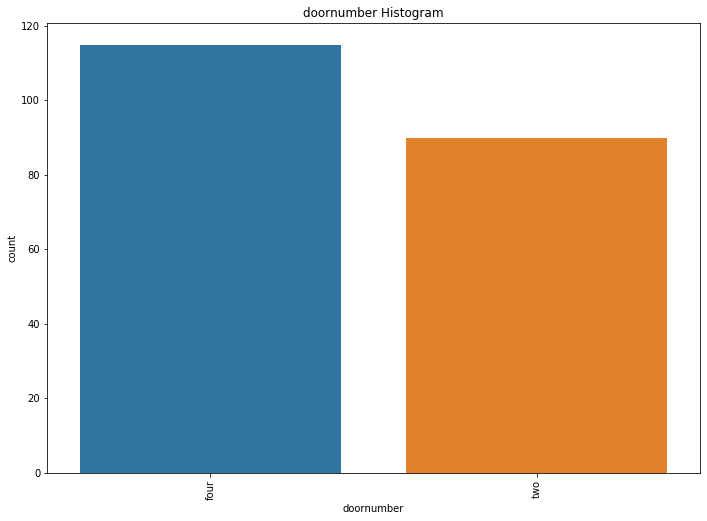

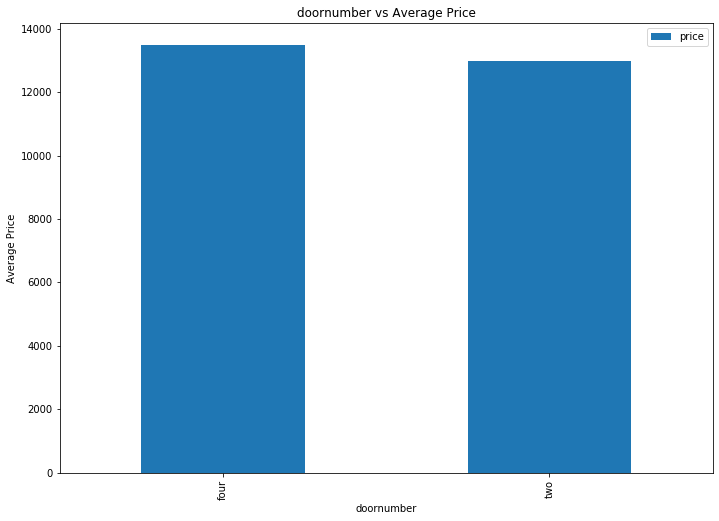

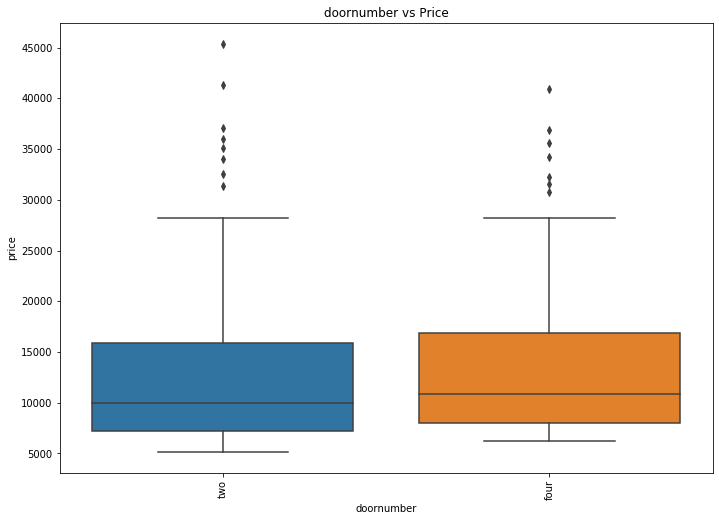

In [141]:
categorical_plot('doornumber')

## Inferences:

> 1. Four door car has more number of sales and having higher average price.

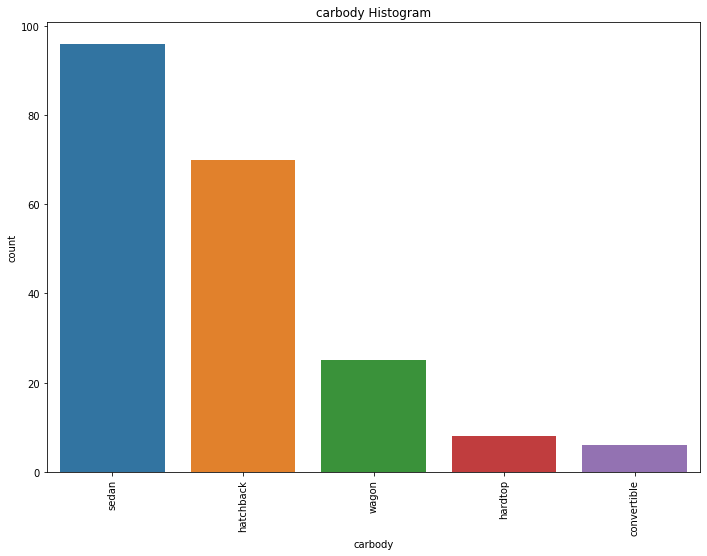

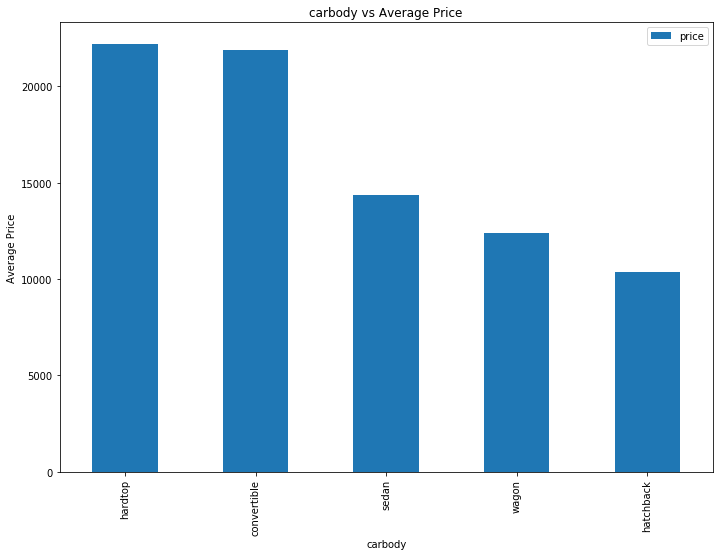

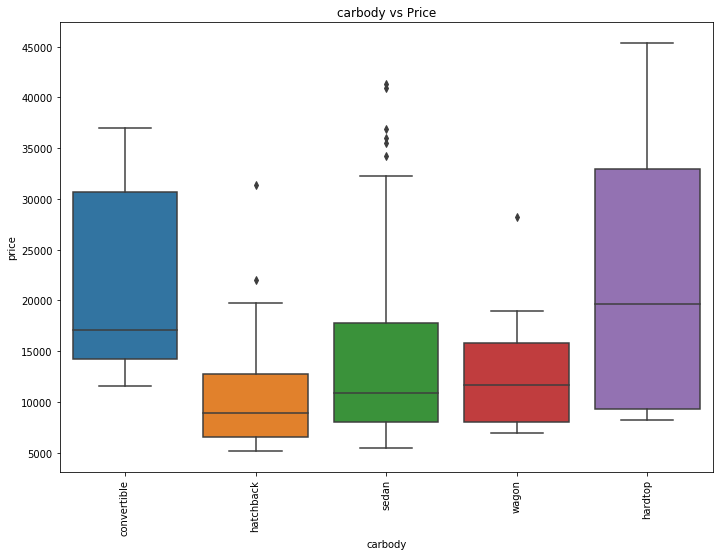

In [142]:
categorical_plot('carbody')

## Inferences:

1. Sedan has more number of sales and hardtop has highest average price.


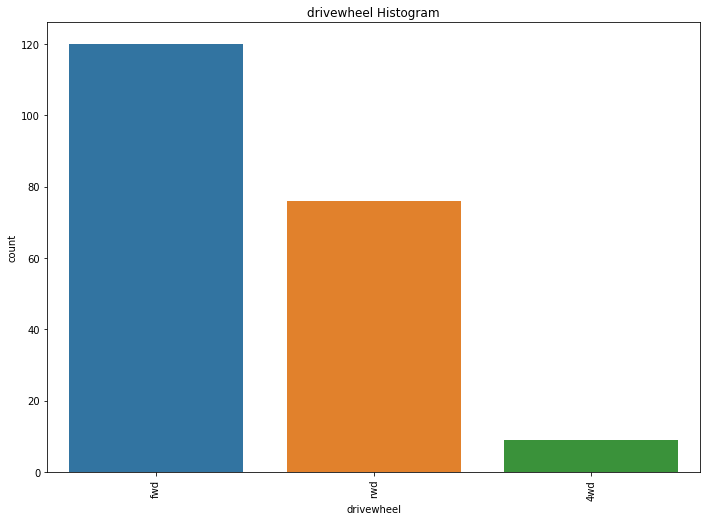

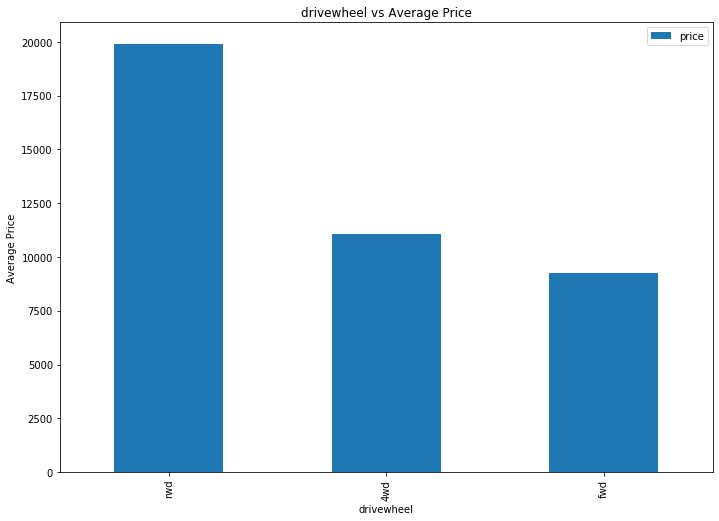

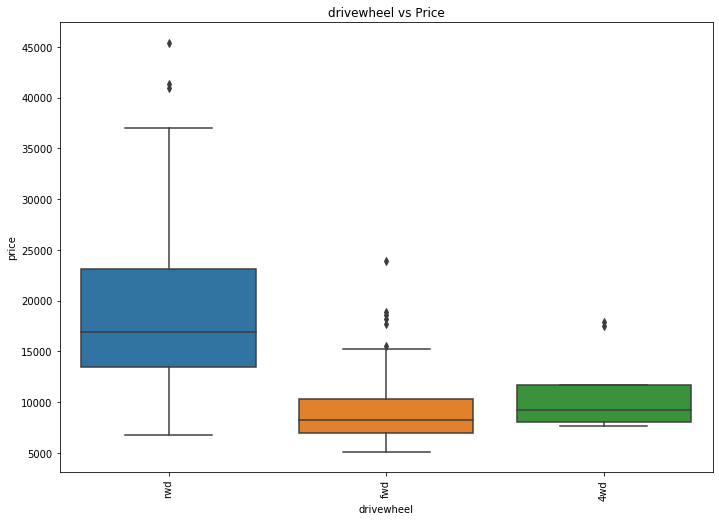

In [143]:
categorical_plot('drivewheel')

## Inferences:

1. rwd having highest average price and fwd having highest sales in the market.

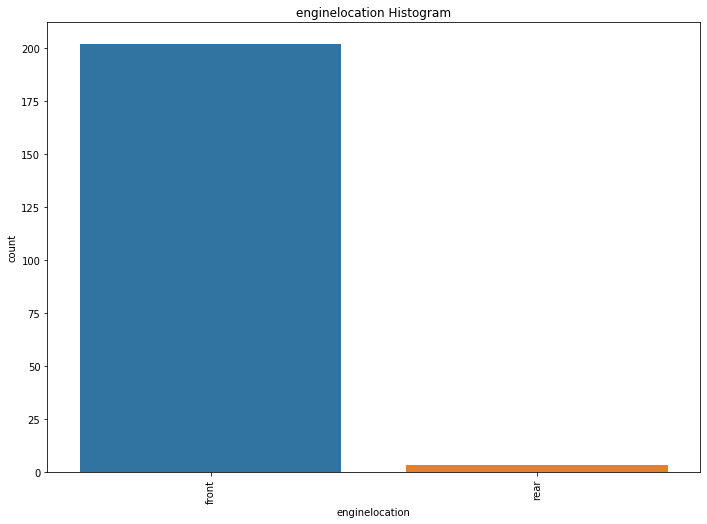

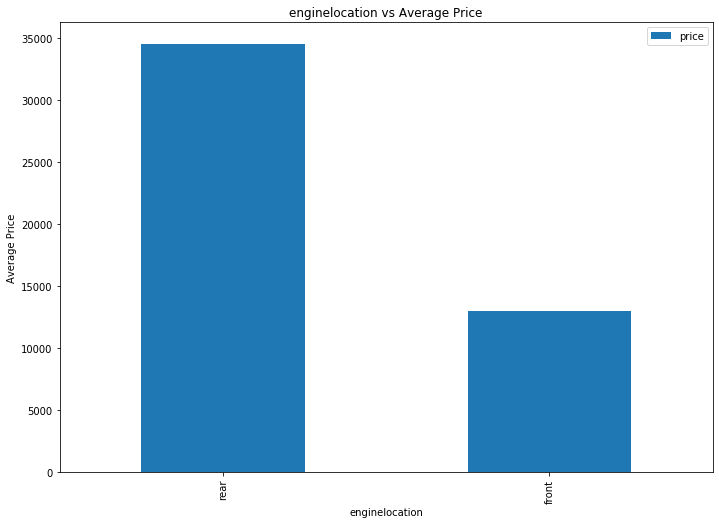

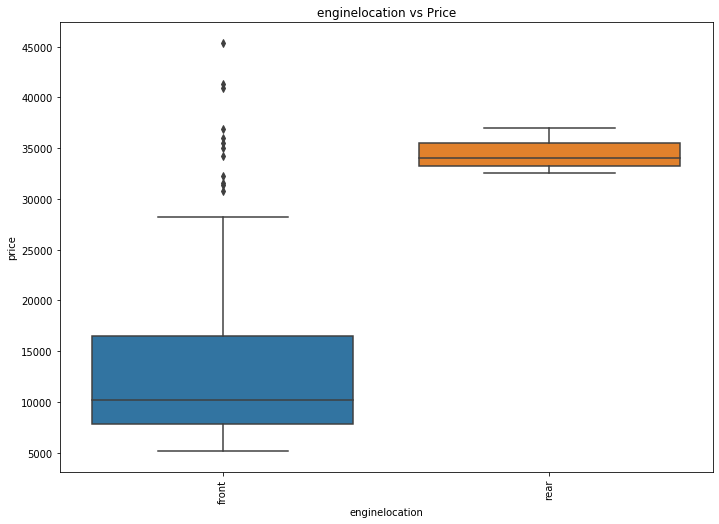

In [144]:
categorical_plot('enginelocation')

## Inferences:

1. front has highest number of sales and rear hving highest average price.

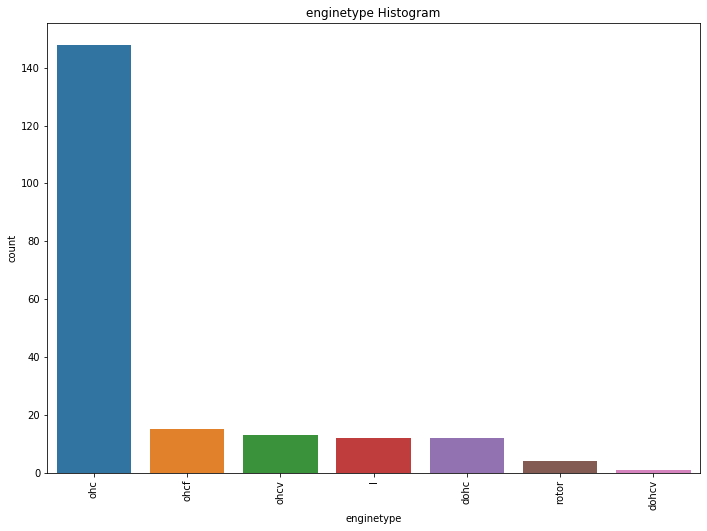

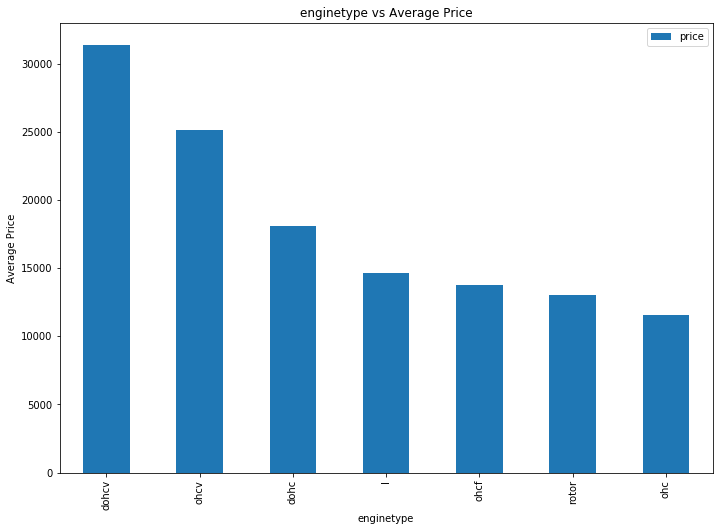

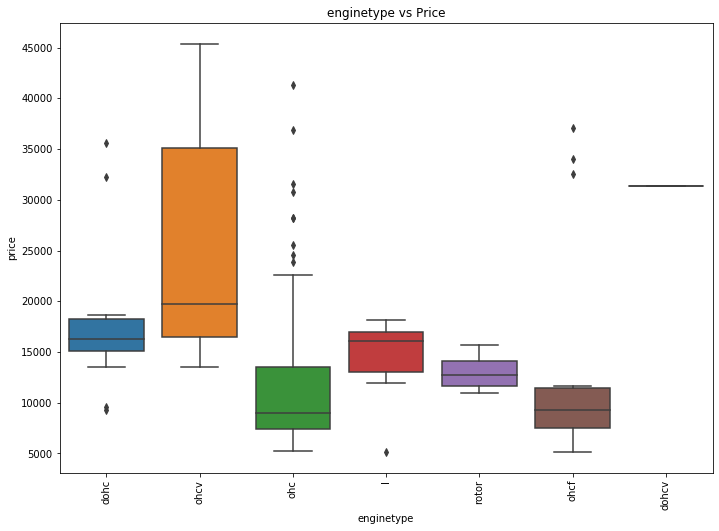

In [145]:
categorical_plot('enginetype')

## Inferences:

1. ohc having highest number of sales and dohcv having highest average price.

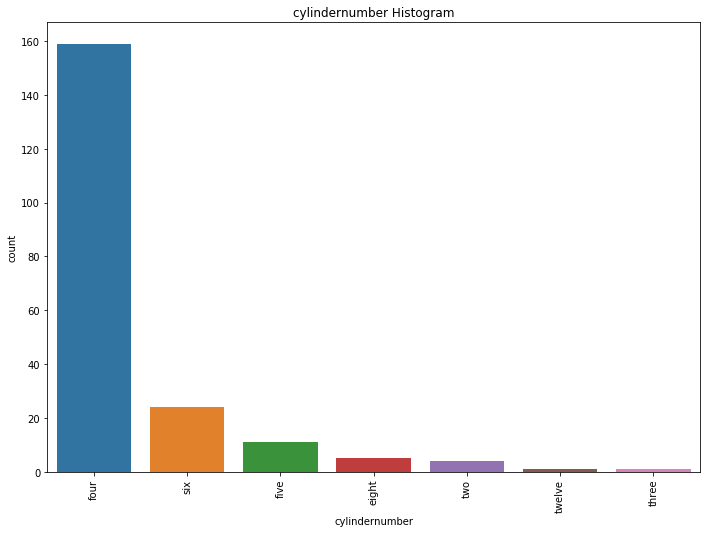

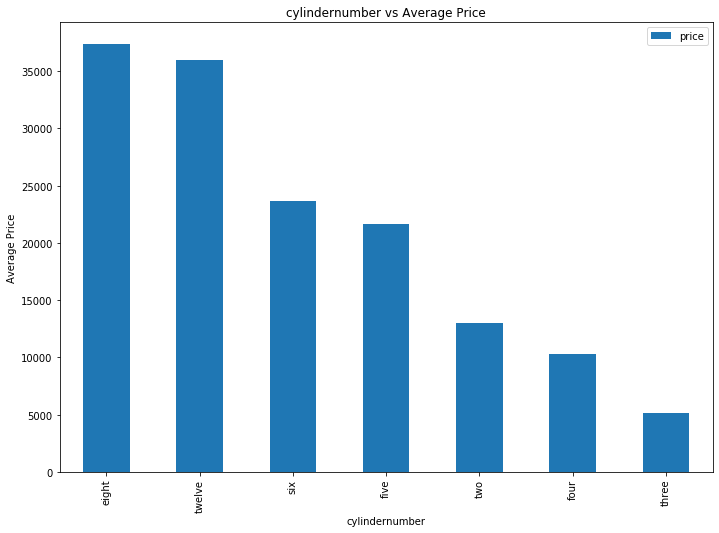

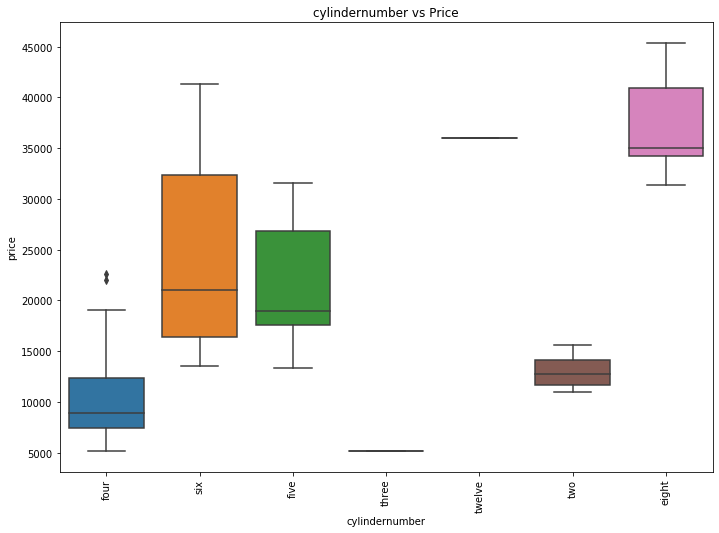

In [146]:
categorical_plot('cylindernumber')

## Inferences:

1. four having highest number of sales and eight having highest average price.

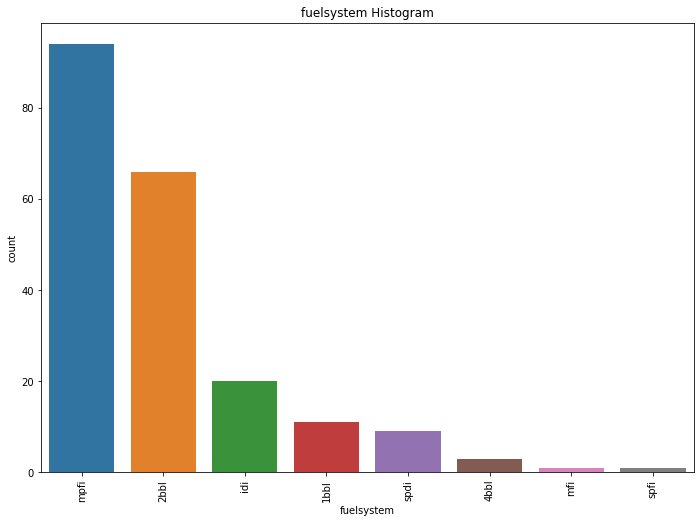

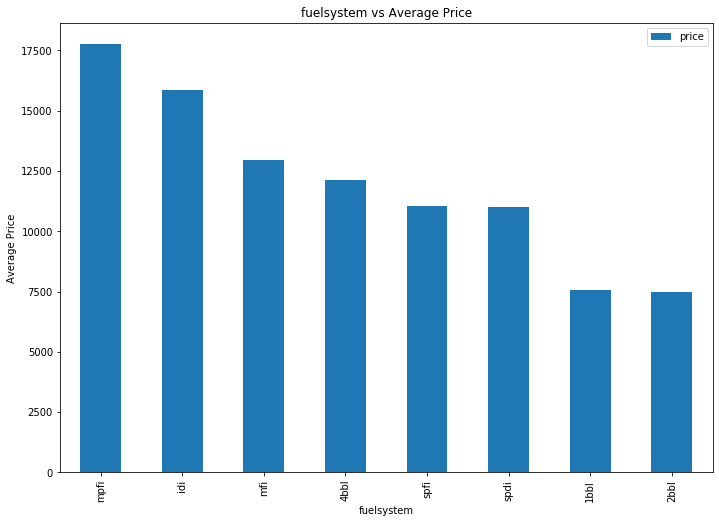

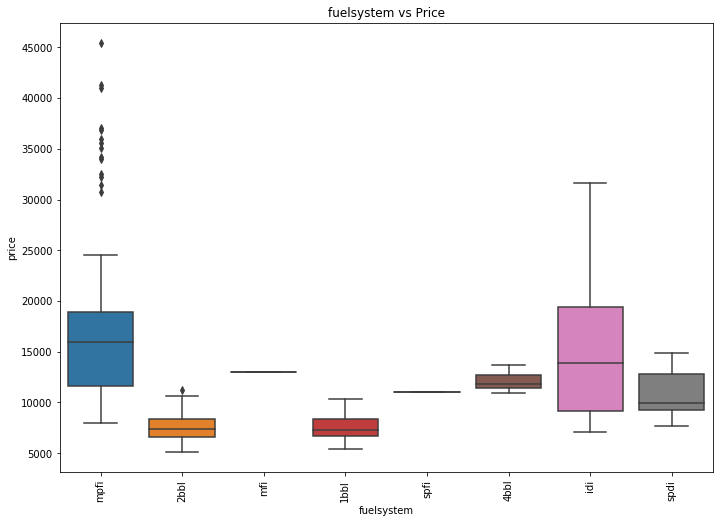

In [147]:
categorical_plot('fuelsystem')

## Inferences:

1. mpfi having highest number of sales and mpfi having highest average price.

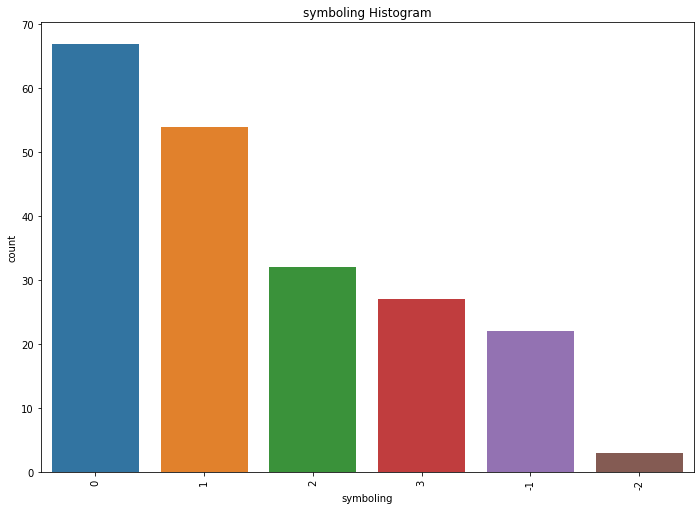

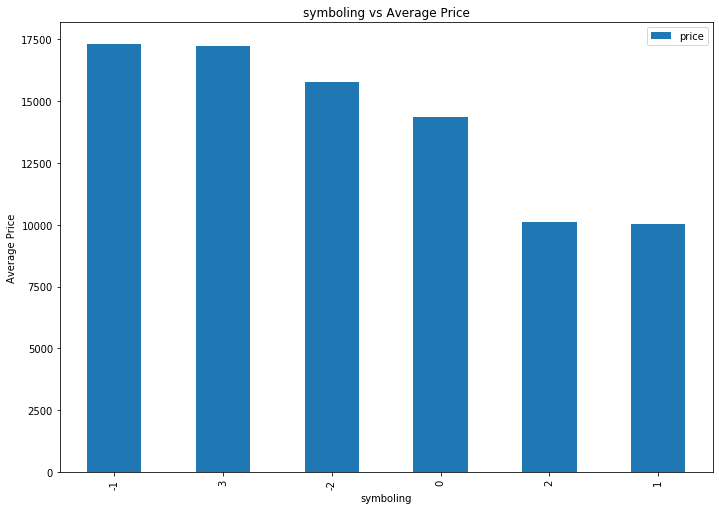

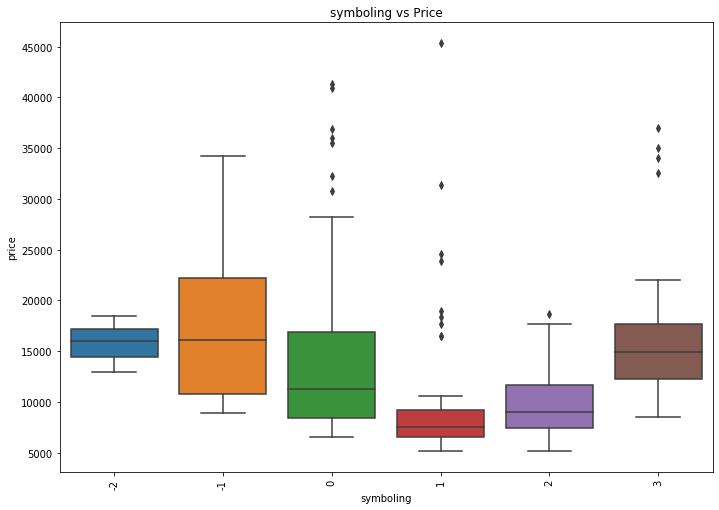

In [148]:
categorical_plot('symboling')

## Inferences:

1. (0) having highest number of sales and (-1 and 3) having higher average price. 

# Numerical data plotting

In [149]:
car_df.dtypes

car_ID              int64  
symboling           int64  
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
Company_Name        object 
dtype: object

In [150]:
# for selecting all categorical variable
var=car_df.select_dtypes(exclude=["bool_","object_"]).columns

In [151]:

len(var)

16

In [152]:
var

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

There is no use of car_ID so it can be dropped

In [153]:
car_df.drop('car_ID',axis=1,inplace=True)

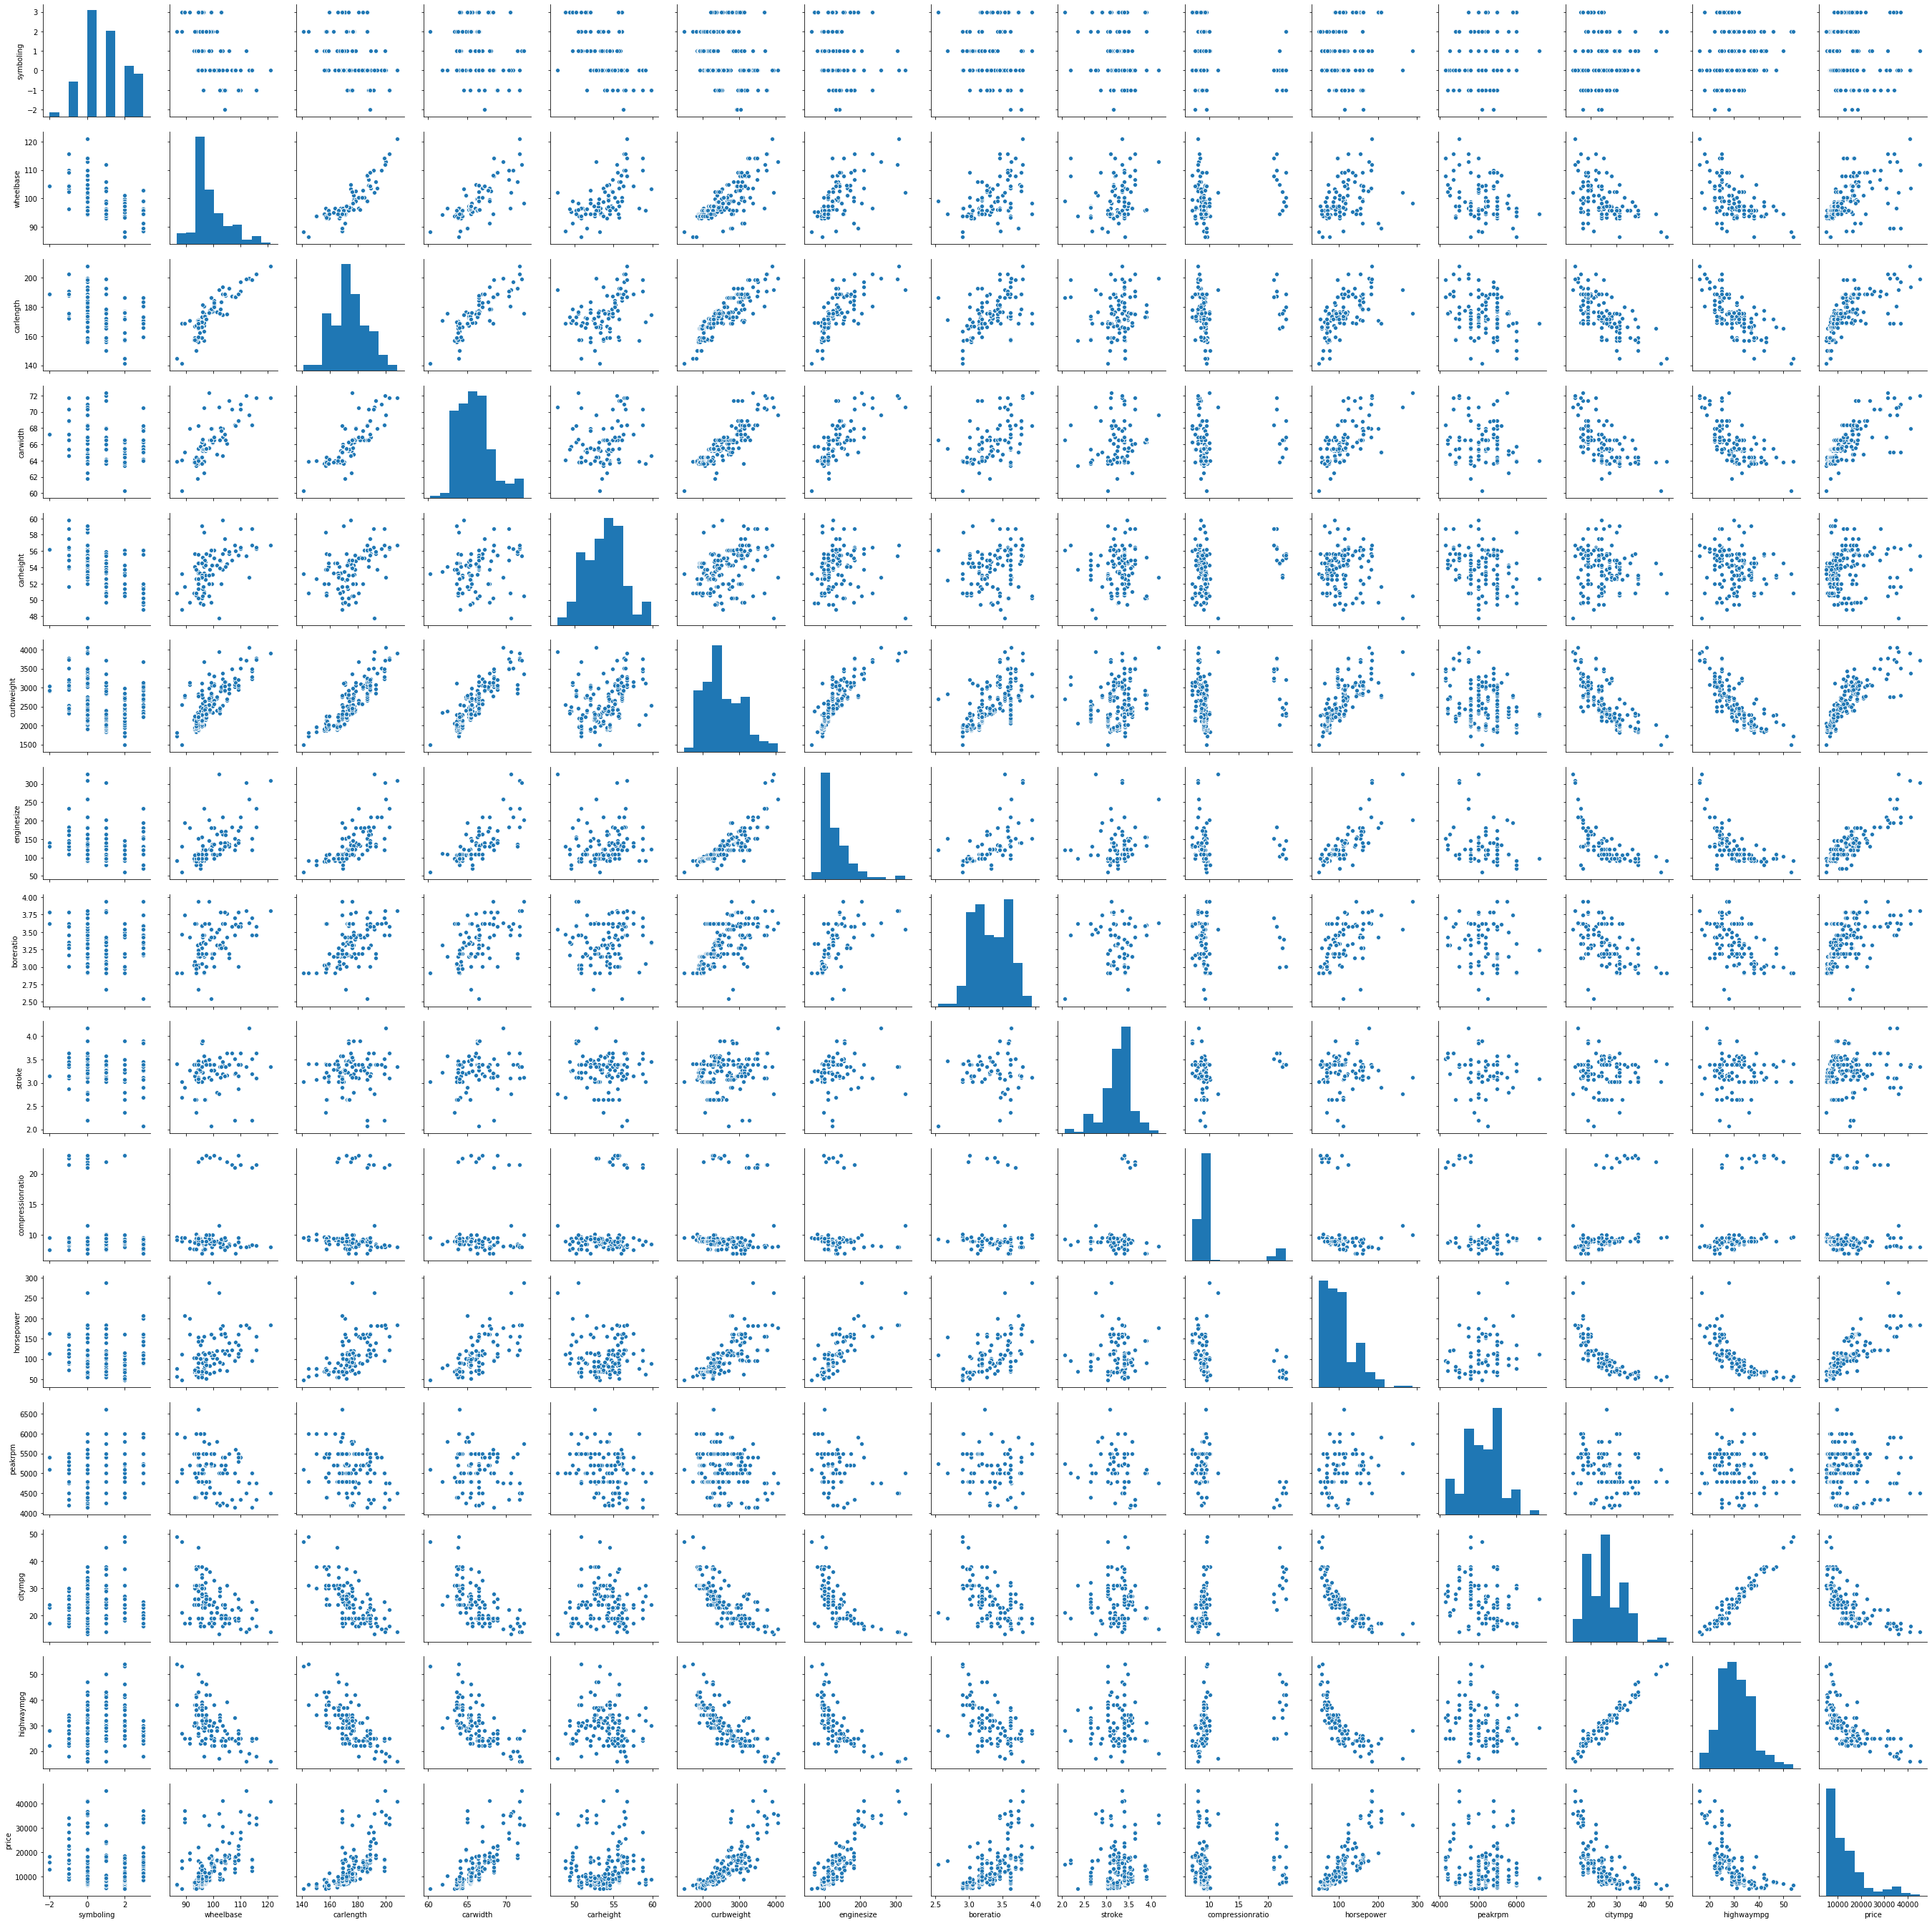

In [154]:
sns.pairplot(car_df)

## User defined function for numerical plot

In [155]:
def scatter_plot(feature,fig):
    plt.subplot(5,2,fig)
    plt.scatter(car_df[feature],car_df['price'])
    plt.title(feature+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(feature)
def pair_plot(feature1,feature2,feature3):
    sns.pairplot(car_df, x_vars=[feature1,feature2,feature3], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

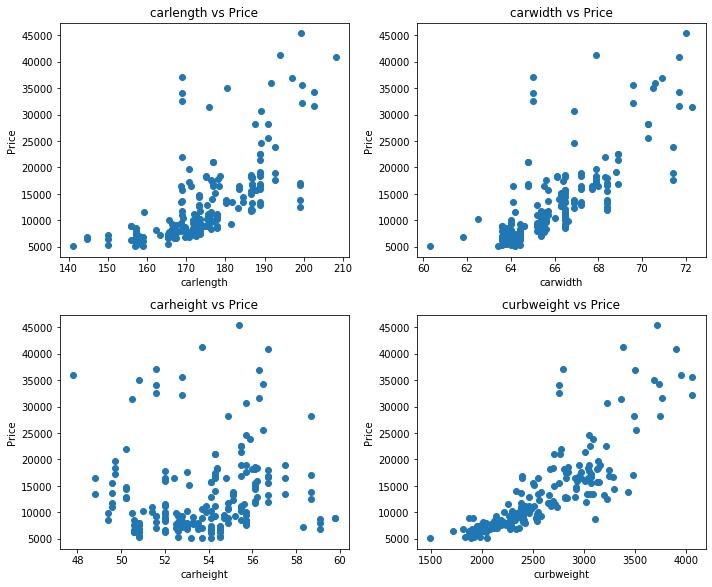

In [156]:
plt.figure(figsize=(10,20))

scatter_plot('carlength', 1)
scatter_plot('carwidth', 2)
scatter_plot('carheight', 3)
scatter_plot('curbweight', 4)


plt.tight_layout()

## Inferences :

1. carwidth,carlength,carbweight has positive corelation with price.

2. carheight doesn't have high imact on price.

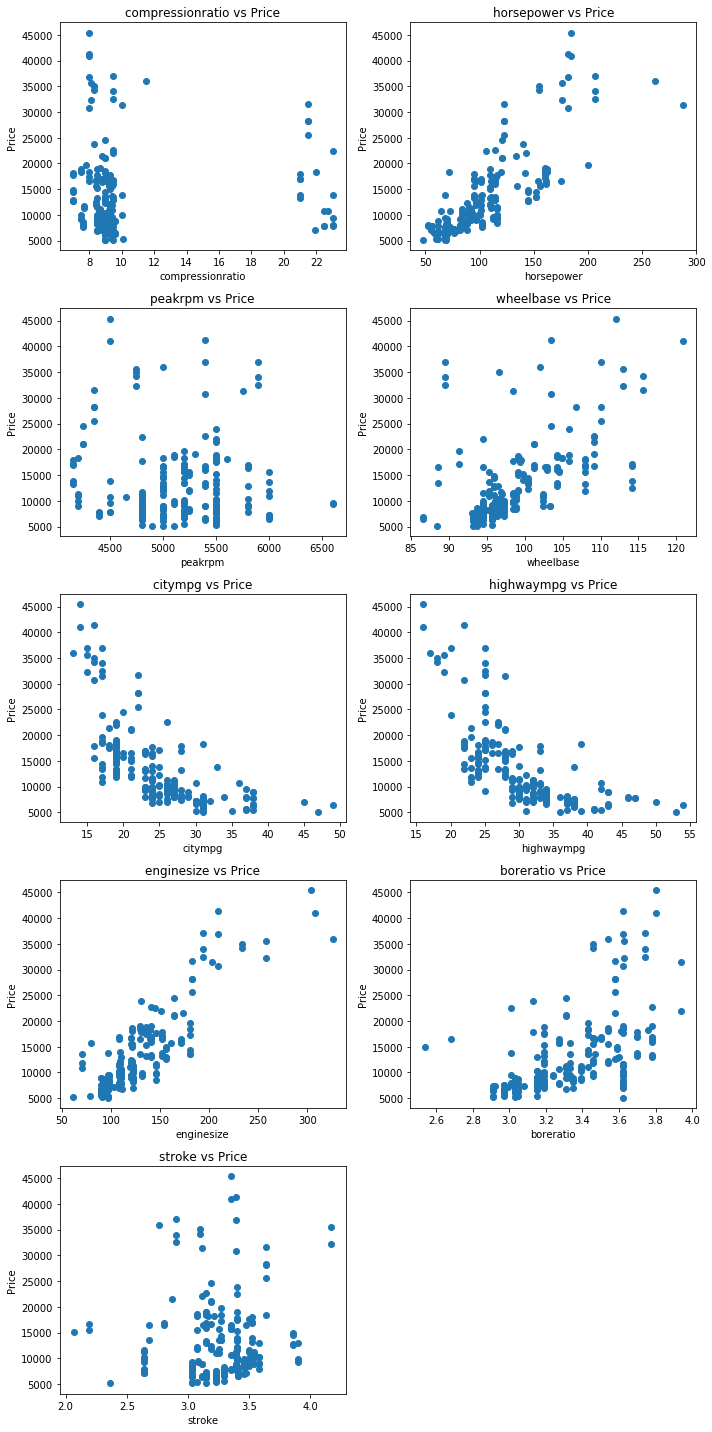

In [157]:
plt.figure(figsize=(10,20))

scatter_plot('compressionratio', 1)
scatter_plot('horsepower', 2)
scatter_plot('peakrpm', 3)
scatter_plot('wheelbase', 4)
scatter_plot('citympg', 5)
scatter_plot('highwaympg', 6)
scatter_plot('enginesize', 7)
scatter_plot('boreratio', 8)
scatter_plot('stroke', 9)


plt.tight_layout()

## Inferences :

1. enginesize,boreratio,horsepower has positive corelation with price.

2. citymillage and highway millage have negative corelation with price.

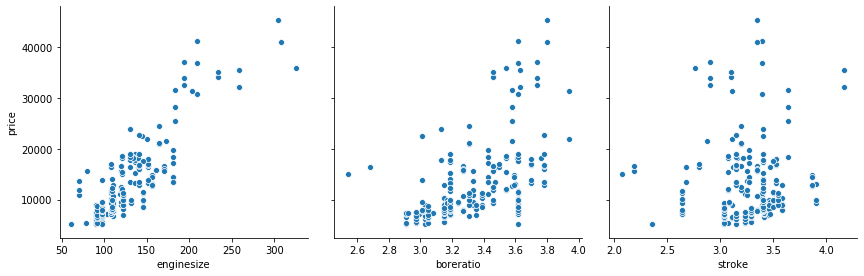

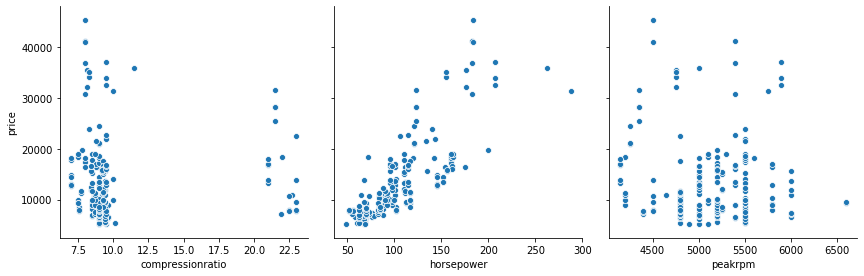

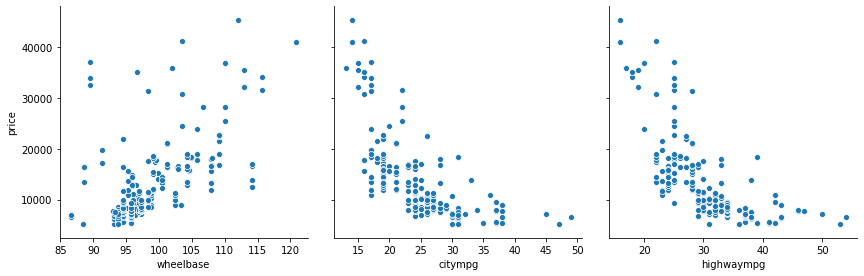

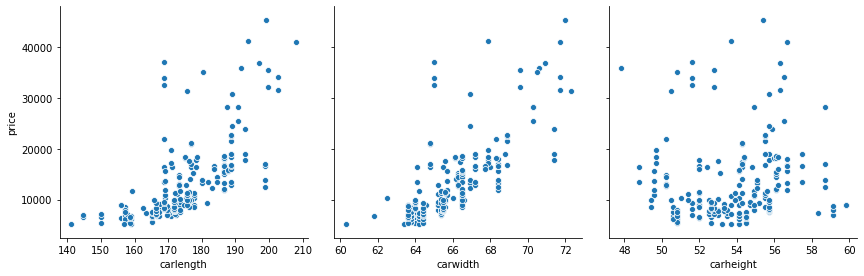

In [158]:
pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')
pair_plot('carlength','carwidth','carheight')

## Derived metrices analysis

In [159]:
# overall millage calculation by using city millage and highway millage with weightage 55% for city and 45% for Highways
car_df['overall_mileage'] = car_df['citympg']*0.55 + car_df['highwaympg']*0.45

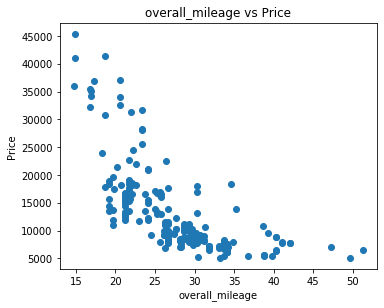

In [160]:
plt.figure(figsize=(10,20))
scatter_plot('overall_mileage',1)
plt.tight_layout()


## Inferences :

1. overall_millage has negative corelation with price.


<Figure size 720x1440 with 0 Axes>

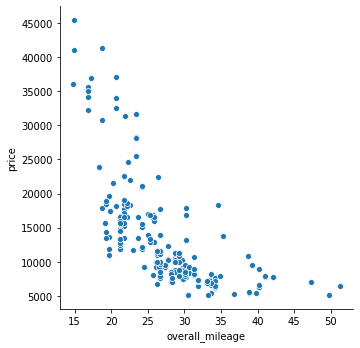

In [161]:
plt.figure(figsize=(10,20))
sns.pairplot(car_df, x_vars=['overall_mileage'], y_vars='price',size=5, aspect=1, kind='scatter')
plt.show()

In [162]:
#Binning the Car Companies based on range of each Company.
car_df['price'] = car_df['price'].astype('int')
car_df_new = car_df.copy()
temp_table = car_df_new.groupby(['Company_Name'])['price'].mean()
car_df_new = car_df_new.merge(temp_table.reset_index(), how='left',on='Company_Name')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Luxary']
car_df['car_category'] = pd.cut(car_df_new['price_y'],bins,right=False,labels=cars_bin)
car_df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,overall_mileage,car_category
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


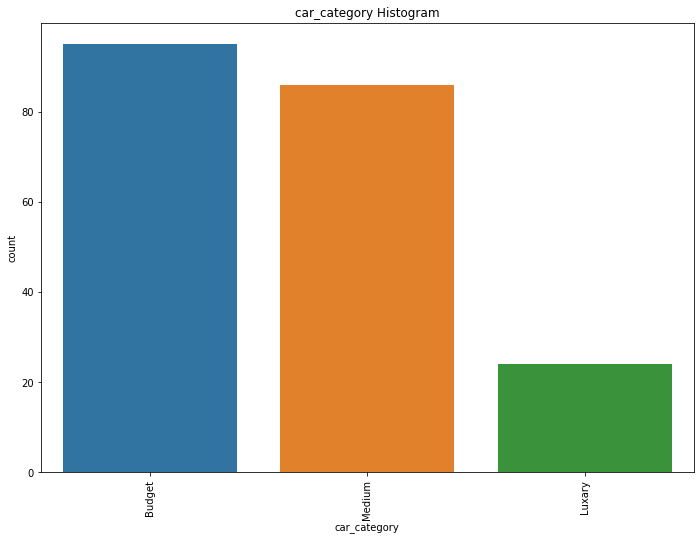

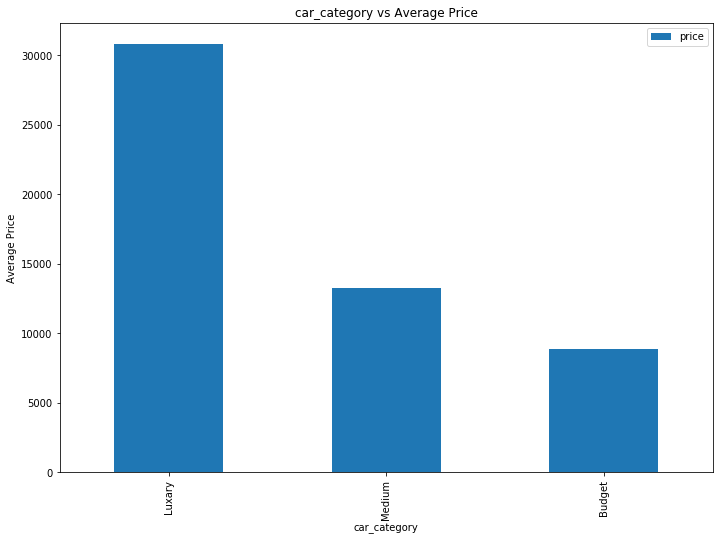

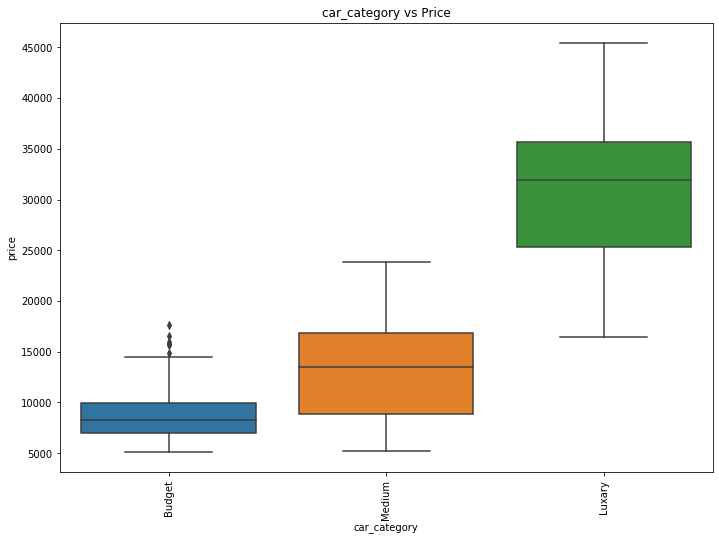

In [163]:
categorical_plot('car_category')

## Bivariate Analysis

In [164]:
# user defined function
def Biv_scatter_plot(feature1,feature2,feature3):
    plt.figure(figsize=(8,6))
    plt1 = sns.scatterplot(x = feature1, y = feature2, hue = feature3, data = car_df)
    plt1.set_xlabel(feature1)
    plt1.set_ylabel('Price of Car')
    plt.show()
    plt.tight_layout()

## Car Category - Horsepower

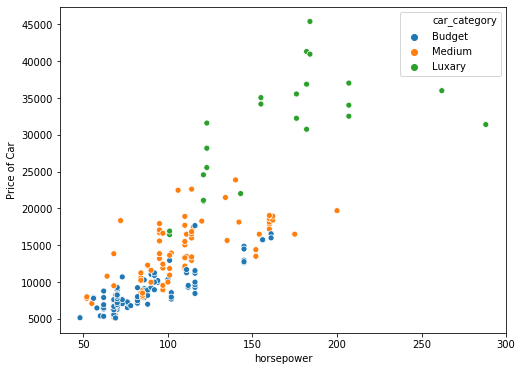

<Figure size 432x288 with 0 Axes>

In [165]:
Biv_scatter_plot('horsepower','price','car_category')

## Inferences:
1. Luxary car comes with more horsepower 

## Horsepower - fueltype

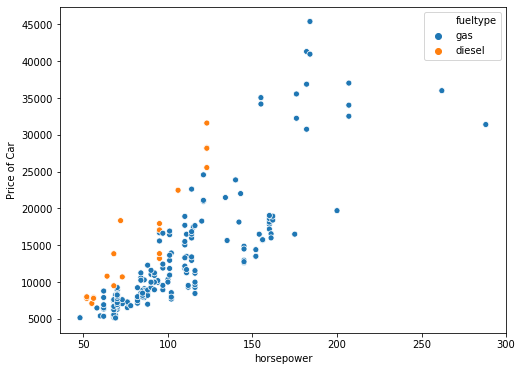

<Figure size 432x288 with 0 Axes>

In [166]:
Biv_scatter_plot('horsepower','price','fueltype')

## Mileage - Fuel Type

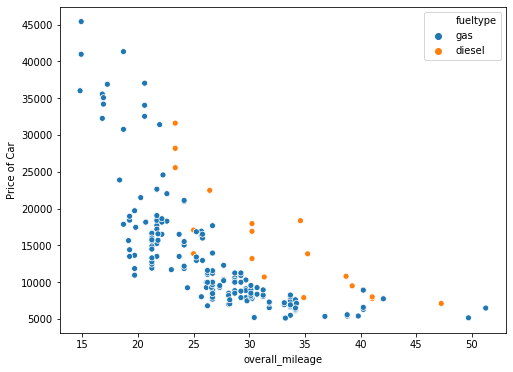

<Figure size 432x288 with 0 Axes>

In [167]:
Biv_scatter_plot('overall_mileage','price','fueltype')

## Inferences:

1.gas fueltype car exist for all price range of car and larger in number

## Overallmileage-drivewheel

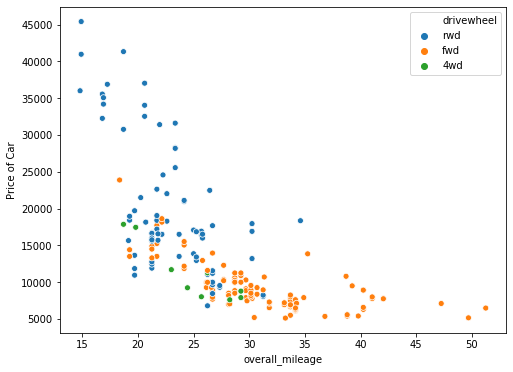

<Figure size 432x288 with 0 Axes>

In [168]:
Biv_scatter_plot('overall_mileage','price','drivewheel')

### Inferences:

1.higher price range  car comes with lower overall_mileage

2.overal_Millage and price have negative corelation and  overall_milage is significant

## fuelsystem-drivewheel-car_category

<Figure size 1800x432 with 0 Axes>

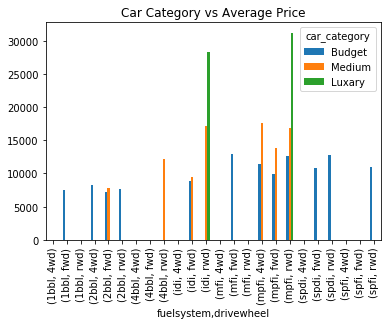

In [169]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(car_df.groupby(['fuelsystem','drivewheel','car_category'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Category vs Average Price')
plt.show()

Inferences:
> 1.Luxary car belongs to mpfi,idi(fuelsystem) and rwd(driverwheel)

## Summary Univariate and Bivriate Analysis:
__From the above Univariate and bivariate analysis we can filter out variables which does not affect price much.__ <br>
__The most important driver variable for prediction of price are:-__
1. Car_Category
2. Fuel Type
3. Aspiration
4. Car Body
5. Drive Wheel
6. Wheelbase
7. Car Length
8. Car Width
9. Curb weight
10. Engine Type
11. Cylinder Number
12. Engine Size
13. Bore Ratio
14. Horsepower
15. overall_mileage

In [170]:
car_df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company_Name',
       'overall_mileage', 'car_category'],
      dtype='object')

# Lineaer Regression model

In [171]:
automobiles_df = car_df[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'car_category', 'overall_mileage']]

In [172]:
automobiles_df.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,car_category,overall_mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495,Medium,23.70
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500,Medium,23.70
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500,Medium,22.15
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950,Medium,26.70
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450,Medium,19.80


In [173]:
automobiles_df.shape

(205, 16)

## Data Preparation

### Dummy variable

### Categorical variables are being converted into numerical with the help of getdummy function


In [174]:
def Create_dummies(feature,df):
    temp = pd.get_dummies(df[feature], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([feature], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

automobiles_df = Create_dummies('fueltype',automobiles_df)
automobiles_df = Create_dummies('aspiration',automobiles_df)
automobiles_df = Create_dummies('carbody',automobiles_df)
automobiles_df = Create_dummies('drivewheel',automobiles_df)
automobiles_df = Create_dummies('enginetype',automobiles_df)
automobiles_df = Create_dummies('cylindernumber',automobiles_df)
automobiles_df = Create_dummies('car_category',automobiles_df)

In [175]:
automobiles_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,overall_mileage,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxary
0,88.6,168.8,64.1,2548,130,3.47,111,13495,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,16500,23.70,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,16500,22.15,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,13950,26.70,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,17450,19.80,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


# Train-Test Split and feature scaling

In [176]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(automobiles_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','overall_mileage']
# ['enginesize','curbweight','horsepower','carlength','carwidth','overall_mileage','Luxary','four','fwd']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [178]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,overall_mileage,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxary
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.068818,0.530864,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.466890,0.213992,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.122110,0.344307,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.314446,0.244170,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.382131,0.122085,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [179]:
df_train.shape

(143, 31)

In [180]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,overall_mileage,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxary
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.407878,0.241351,0.497946,0.227302,0.219309,0.358265,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.205581,0.204848,0.184517,0.211269,0.154619,0.207140,0.165511,0.215682,0.185980,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.245539,0.135849,0.305556,0.091667,0.067298,0.198903,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.355702,0.184906,0.500000,0.191667,0.140343,0.344307,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.559542,0.301887,0.682540,0.283333,0.313479,0.512346,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


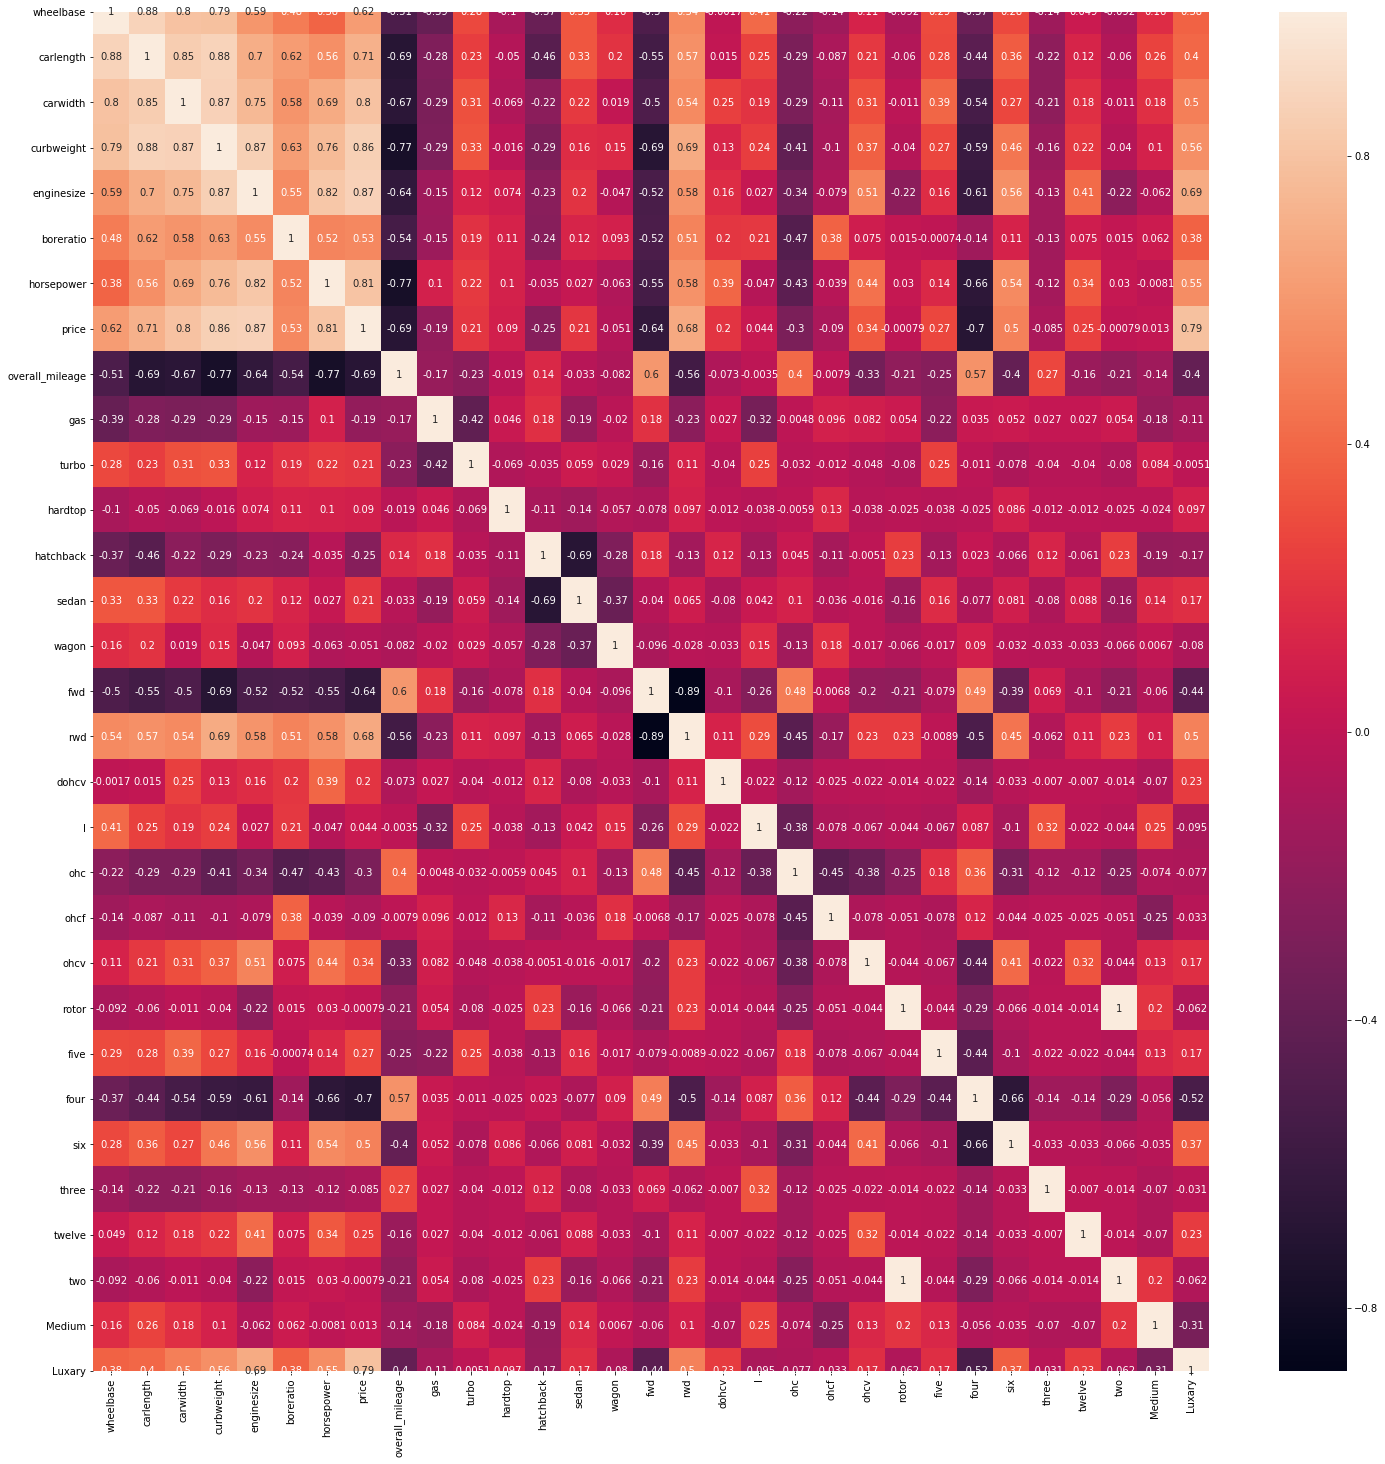

In [181]:
#Correlation using heatmap
plt.figure(figsize = (25, 25))
cor_matrix=df_train.corr()
sns.heatmap(cor_matrix, annot = True)
plt.show()

In [182]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [183]:
X_train.shape

(143, 30)

In [184]:
X_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,overall_mileage,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxary
122,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,0.083333,0.530864,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,0.395833,0.213992,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,0.266667,0.344307,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,0.262500,0.244170,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,0.475000,0.122085,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Model Building

In [185]:
#impoting library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Building a linear model by using VIF and RFE

In [186]:
# User Defined Function for building model
def generate_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def findVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [187]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [188]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('overall_mileage', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Luxary', True, 1)]

In [189]:
temp=X_train.columns[rfe.support_]
X_train_rfe = X_train[temp]
X_train_rfe.head()

,carwidth,curbweight,horsepower,overall_mileage,hatchback,sedan,wagon,dohcv,twelve,Luxary
122,0.291667,0.272692,0.083333,0.530864,0,1,0,0,0,0
125,0.666667,0.500388,0.395833,0.213992,1,0,0,0,0,1
166,0.308333,0.314973,0.266667,0.344307,1,0,0,0,0,0
1,0.316667,0.411171,0.262500,0.244170,0,0,0,0,0,0
199,0.575000,0.647401,0.475000,0.122085,0,0,1,0,0,0


## Model 1

In [190]:
# variable for storing linear model data x part
X_train_lm1=X_train_rfe

In [191]:
car_lm1 = generate_model(X_train_lm1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.29e-70
Time:                        20:43:43   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0947      0.042     

> ### it can be found that p-value of twelvw is greater than significant value 0.05 and highest among all features so it can be dropped

> ###  Model 2

In [192]:
X_train_lm2 = X_train_lm1.drop(["twelve"], axis = 1)

In [193]:
car_lm2 = generate_model(X_train_lm2,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.25e-71
Time:                        20:43:43   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0764      0.041     

> > ### from the above result it can be found that P value for overall mileage is greater than 0.05 and highest among features so it can be dropped.

## Model 3

In [194]:
X_train_lm3 = X_train_lm2.drop(["overall_mileage"], axis = 1)

In [195]:
car_lm3= generate_model(X_train_lm3,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.85e-72
Time:                        20:43:43   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [196]:
#Calculating the Variance Inflation Factor
findVIF(car_lm3)

,Features,VIF
0,const,26.90
2,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
1,carwidth,5.14
3,horsepower,3.61
6,wagon,3.58
8,Luxary,1.63
7,dohcv,1.46


## MOdel 4
dropping curbweight because of high VIF value. (shows that curbweight has high multicollinearity.)

In [227]:
X_train_lm4 = X_train_lm3.drop(["curbweight"], axis = 1)

In [228]:
car_lm4 = generate_model(X_train_lm4,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           4.70e-70
Time:                        20:43:44   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [199]:
findVIF(car_lm4)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
2,horsepower,2.50
1,carwidth,2.22
7,Luxary,1.56
6,dohcv,1.21


## Model 5


### dropping sedan as it is showing high VIF

In [200]:
X_train_lm5 =X_train_lm4.drop(["sedan"], axis = 1)

In [201]:
car_lm5 = generate_model(X_train_lm5,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.68e-69
Time:                        20:43:43   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [202]:
findVIF(car_lm5)

,Features,VIF
0,const,10.82
2,horsepower,2.39
1,carwidth,2.09
6,Luxary,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


## Model 6

### wagon has high P value so it can be dropped

In [203]:
X_train_lm6 = X_train_lm5.drop(["wagon"], axis = 1)

In [204]:
car_lm6 = generate_model(X_train_lm6,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.57e-70
Time:                        20:43:43   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [205]:
findVIF(car_lm6)

,Features,VIF
0,const,10.39
2,horsepower,2.39
1,carwidth,2.08
5,Luxary,1.53
4,dohcv,1.21
3,hatchback,1.13


In [206]:
#Dropping dohcv to find out is there any change in model
X_train_lm7 = X_train_lm6.drop(["dohcv"], axis = 1)

In [207]:
car_lm7 = generate_model(X_train_lm7,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.04e-67
Time:                        20:43:43   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [208]:
findVIF(car_lm7)

,Features,VIF
0,const,10.04
2,horsepower,2.22
1,carwidth,2.08
4,Luxary,1.53
3,hatchback,1.10


# Residual analysis of training data

In [209]:
X_train_lm7.head()

,carwidth,horsepower,hatchback,Luxary
122,0.291667,0.083333,0,0
125,0.666667,0.395833,1,1
166,0.308333,0.266667,1,0
1,0.316667,0.262500,0,0
199,0.575000,0.475000,0,0


In [210]:
car_lm7.head()

,const,carwidth,horsepower,hatchback,Luxary
122,1.0,0.291667,0.083333,0,0
125,1.0,0.666667,0.395833,1,1
166,1.0,0.308333,0.266667,1,0
1,1.0,0.316667,0.262500,0,0
199,1.0,0.575000,0.475000,0,0


In [211]:
car_lm_final = sm.OLS(y_train,car_lm7).fit()
y_train_price = car_lm_final.predict(car_lm7)


In [212]:
print(car_lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.04e-67
Time:                        20:43:43   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

In [213]:
y_train_price.head()

122    0.069643
125    0.593598
166    0.115545
1      0.158405
199    0.354161
dtype: float64

Text(0.5, 0, 'Errors')

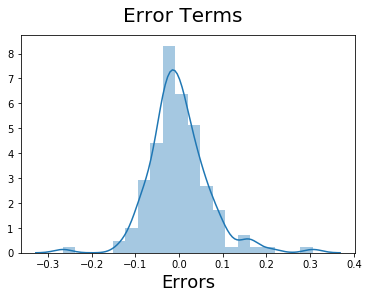

In [214]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Prediction 

# Prediction

In [215]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','overall_mileage','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [216]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [217]:
df_test.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,overall_mileage,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two,Medium,Luxary
160,0.265306,0.341732,0.200000,0.132148,0.082969,0.515873,0.116129,1.000000,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
186,0.311953,0.426772,0.315789,0.219125,0.131004,0.515873,0.212903,0.561694,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
59,0.355685,0.522835,0.421053,0.271985,0.187773,0.674603,0.206452,0.508287,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
165,0.230321,0.379528,0.157895,0.214320,0.082969,0.555556,0.387097,0.458564,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
140,0.195335,0.200000,0.136842,0.202307,0.126638,0.857143,0.135484,0.491713,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [218]:
y_test.head(10)

160    0.058474
186    0.077398
59     0.086148
165    0.097473
140    0.055099
64     0.146146
198    0.325517
75     0.277593
172    0.306742
104    0.294993
Name: price, dtype: float64

In [219]:
# Now let's use our model to make predictions.
X_train_new = car_lm7.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [220]:
X_test_new.head()

,const,carwidth,horsepower,hatchback,Luxary
160,1.0,0.200000,0.116129,0,0
186,1.0,0.315789,0.212903,0,0
59,1.0,0.421053,0.206452,1,0
165,1.0,0.157895,0.387097,0,0
140,1.0,0.136842,0.135484,1,0


In [221]:
X_train_new.columns

Index(['carwidth', 'horsepower', 'hatchback', 'Luxary'], dtype='object')

In [222]:
# Making predictions
y_pred = car_lm_final.predict(X_test_new)

In [223]:
y_pred.head()

160    0.047811
186    0.136225
59     0.133637
165    0.150432
140   -0.010054
dtype: float64

## Model Evaluation

In [224]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8614595209022033

Text(0, 0.5, 'y_pred')

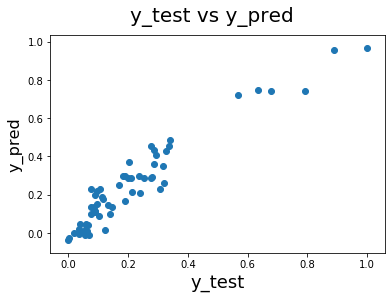

In [225]:

# for getting understanding about the spreat Plotting y_test and y_pred 
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)            
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   

In [226]:
print(car_lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.04e-67
Time:                        20:43:44   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

### Inference:
> >1. R square and adjusted R square reaches 89.9% and 89.6% it may be developed by using more derived matrics according to buisness dmain
> >2. This model can explain approx 90% of variance
> >3. All variables are significant since all have significant p-value less than 0.05 and low VIF

> > 4.Overall model can be explined with F-static and probable(f-static)